# Task #2 - Ultrasound Task

## Team Members:

\begin{array}{ccc}
Name&BN\\
Ahmed\ Kamal&4\\
Abdelrahman\ Shawky&35\\
Ziyad\ Hossam&25\\
Omar\ Abdel_Naser&44\\
Hazem\ Raafat&14\\
\end{array}

# Installing Our Package / Toolbox: PyMust

### PyMust: is a Python reimplementation of the **MUST** ultrasound toolbox for synthetic image generation and reconstruction

In [ ]:
!pip install pymust


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 4.5 MB/s eta 0:00:00


## Importing our Libraries

In [ ]:
import pymust as pymust
import numpy as np
import matplotlib.pyplot as plt

## Setup Parameters

# Initialize Transducer (Phased Array Transducer)
Download the properties of a 2.7-MHz 64-element cardiac phased array in a structure param by using GETPARAM.

In [ ]:
# Initialize transducer
param = pymust.getparam('P4-2v');

In [ ]:
param

{'fc': 2720000.0,
 'kerf': 5e-05,
 'width': 0.00025,
 'pitch': 0.0003,
 'Nelements': 64,
 'bandwidth': 74,
 'radius': inf,
 'height': 0.014,
 'focus': 0.06}

# Single Focus Point Pressure Field

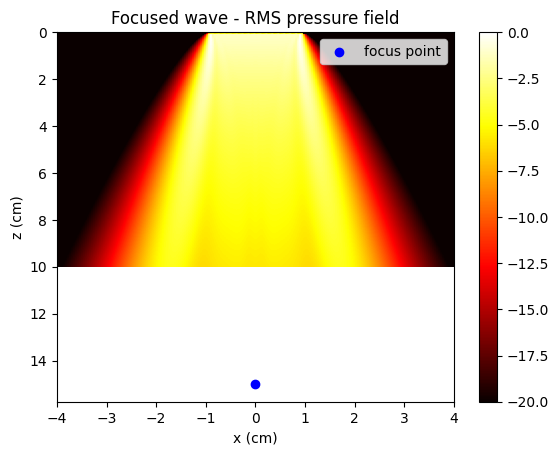

In [ ]:
# Choose a focus location at xf = 2 cm, zf = 5 cm.
xf = 0e-2;
zf = -5e-2; # focus position (in m)

# Obtain the corresponding transmit time delays (in s).
txdel = pymust.txdelay(xf, zf, param)
# txdel = np.zeros_like(txdel)  # All delays are zero

# Simulate the pressure field by using PFIELD.
# First define an image grid.
x = np.linspace(-4e-2, 4e-2, 200); # in m
z = np.linspace(0, 10e-2, 200); # in m
x, z = np.meshgrid(x, z);
y = np.zeros_like(x)

# The function PFIELD yields the root-mean-square (RMS) pressure field.
P, _, _  = pymust.pfield(x,y, z,txdel,param)

# Display the acoustic pressure field.[x[0,0], x[-1,-1], z[-1,-1], z[0,0]]
plt.imshow(20*np.log10(P/np.max(P)), cmap='hot',extent= np.array([x[0,0], x[-1,-1], z[-1,-1], z[0,0]])*1e2, aspect='auto')
plt.colorbar()
plt.clim(-20, 0)
plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Focused wave - RMS pressure field')
plt.scatter(xf*1e2, 10-zf*1e2, c = 'b', label = 'focus point')
plt.legend()

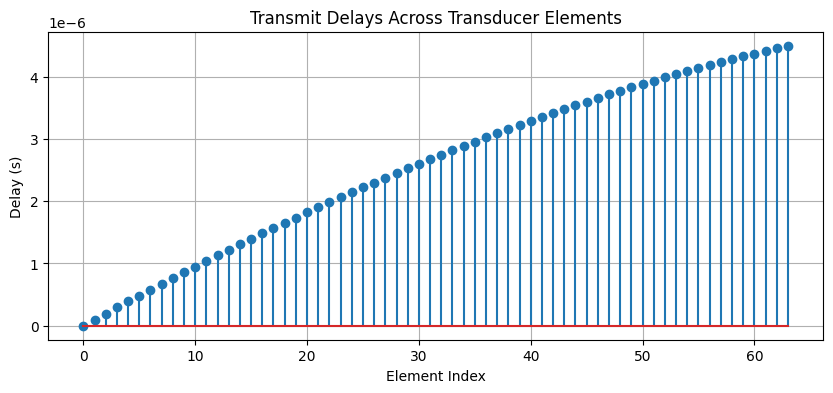

In [ ]:
txdel = np.array(txdel).flatten()  # Flattening in case it's not 1D

# Visualizing the delays
plt.figure(figsize=(10, 4))
plt.stem(txdel)
plt.title("Transmit Delays Across Transducer Elements")
plt.xlabel("Element Index")
plt.ylabel("Delay (s)")
plt.grid()
plt.show()


# Diverging Wave Pressure Field

Text(0.5, 1.0, 'Diverging wave - RMS pressure field')

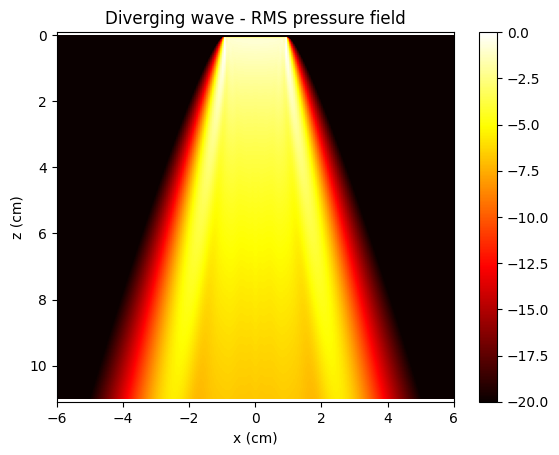

In [ ]:
# Calculate the transmit delays to generate a 75-degrees wide circular wave. Use TXDELAY.

width = 30 / 180 * np.pi # width angle in rad
tilt = 0 # tilt angle in rad
txdel = pymust.txdelay(param, tilt, width) #% in s

# Define a transmit apodization.
param.TXapodization = np.cos(np.linspace(-3*np.pi/8, 3*np.pi/8, 64)); # if didn't work uncomment this line
plt.bar(np.arange(txdel.shape[1]), param.TXapodization*1e6)
plt.xlabel('Element number')
plt.title('TX apodization')

# Simulate the pressure field by using PFIELD.
# First define an image grid.
x = np.linspace(-6e-2, 6e-2, 200); # in m
z = np.linspace(0, 11e-2, 200); # in m
x, z = np.meshgrid(x, z);
y = np.zeros_like(x)

# The function PFIELD yields the root-mean-square (RMS) pressure field.
P,_,_ = pymust.pfield(x, y, z,txdel,param);

# Display the acoustic pressure field.
plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
plt.clim(-20, 0) #dynamic range = [-20,0] dB
plt.axis('equal')
c = plt.colorbar()
#c.YTickLabel{end} = '0 dB';
plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('Diverging wave - RMS pressure field')

# Multi-Focus Point Pressure Field


Text(0.5, 1.0, 'MLT - RMS pressure field')

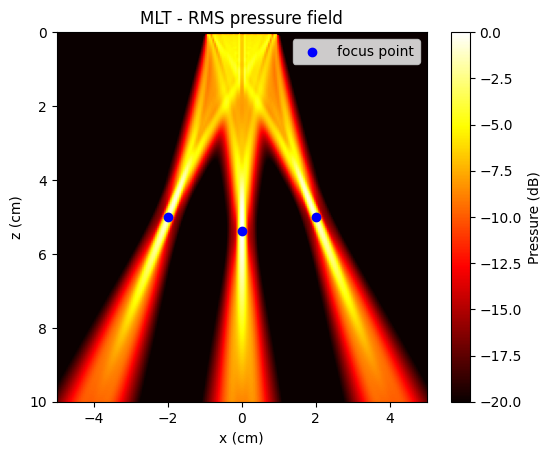

In [ ]:
# Define the TX delays for a 3-MLT transmit sequence.

x0 = 2e-2;
z0 = 5e-2; # in m
xf = np.array([-x0, 0, x0]);
zf = np.array([z0, np.sqrt(x0**2+z0**2), z0]); # focus points (in m)
txdel = pymust.txdelay(xf, zf, param); # in s
# Simulate the pressure field with PFIELD.

# Define the image grid.
x = np.linspace(-5e-2,5e-2,200); # in m
z = np.linspace(0,10e-2,200); # in m
x,z = np.meshgrid(x,z); # image grid
y = np.zeros(x.shape);

# Use PFIELD to obtain the RMS pressure field.
P,_,_ = pymust.pfield(x,y,z,txdel,param)

# Display the pressure field.
plt.imshow(20*np.log10(P/np.max(P)), extent = np.array([x[0,0], x[-1,-1], z[-1,-1], z[0,0]])*1e2, cmap = 'hot')
cbar = plt.colorbar()
cbar.set_label('Pressure (dB)')
plt.clim(-20, 0)
plt.scatter(xf*1e2,zf*1e2,c = 'b', label = 'focus point')
plt.legend()
plt.xlabel('x (cm)')
plt.ylabel('z (cm)')
plt.title('MLT - RMS pressure field')
